# Analysis of experimental requirements

This notebook is based on Appendix C *Analysis of experimental requirements* of the paper *Can gravity mediate the transmission of quantum information?*

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import LogNorm # Necessary to make logarithmic contour plots

# Plotting style settings
plt.rcParams.update({
    "text.usetex": True,
})
plt.rcParams.update({"font.family": "serif", "font.size": 12})

# Physical constants and parameters
hbar = 1.055 * 1E-34
kB = 1.381 * 1E-23
G = 6.674 * 1E-11
rho_gold = 19320
temp = 1.0E-3
omega_laser = 1.0E15

In [2]:
# Gravitational critical frequency (see Appendix for its analytic derivation)
w_G = np.sqrt((np.pi / 6) * G * rho_gold)

# Environmental critical frequency
w_T =  kB * temp / hbar

print(f"w_G: {w_G:n}")
print(f"w_T: {w_T:n}")

w_G: 0.000821667
w_T: 1.309e+08


In [131]:
def lam(omega):
    """Optomechanical coupling rate."""
    return w_G**2 / omega

def n_bose(omega):
    """Bose-Einstein occupation number."""
    return 1.0 / (np.exp(omega / w_T) - 1.0)

def gamma(omega, q):
    """Mechanical damping rate as a function of 'omega' and quality factor 'q'."""
    return omega / q

def eta(omega, q):
    """Gravity induced transmissivity as a function of 'omega' and quality factor 'q'."""
    factor = q**2 * (w_G / omega)**4
    return 2.0 * factor / (1.0 + np.sqrt(1.0 + 4.0 * factor) + 2.0 * factor)
    
def non_classicality_condition(omega, q):
    """If larger than 1, the gravity-induced channel is non-classical.""" 
    return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))

def non_classicality_condition_bis(omega, q):
    """If larger than 1, the gravity-induced channel is non-classical.""" 
    return (w_G/omega)**4 * (q**2) / (n_bose(omega) * (n_bose(omega) + 1.0))

def tau(omega, q):
    """Minimum time duration of the experiment."""
    gamma_eff = gamma(omega, q) + np.sqrt(gamma(omega, q)**2 + 4 * lam(omega)**2)
    return 1 / gamma_eff

def eta_min(omega, q, power):
    """Minimum transmissivity at fixed power."""
    return hbar * omega_laser / (tau(omega, q) * power)

def power_min(omega, q):
    """Minimum transmissivity at fixed power."""
    return hbar * omega_laser / (tau(omega, q) * eta(omega, q))

def classical_quantum_boundary_Q(omega):
    return np.sqrt( n_bose(omega) * (n_bose(omega) + 1.0) ) / ( (w_G/omega)**2 )

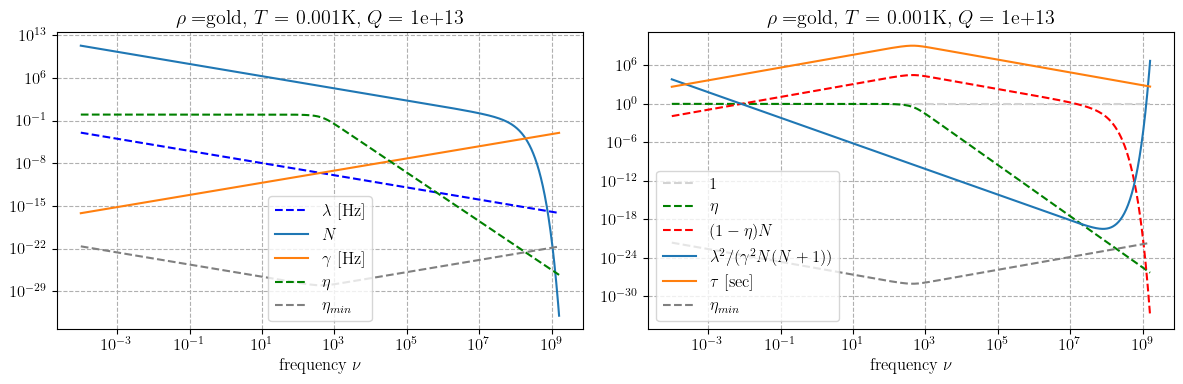

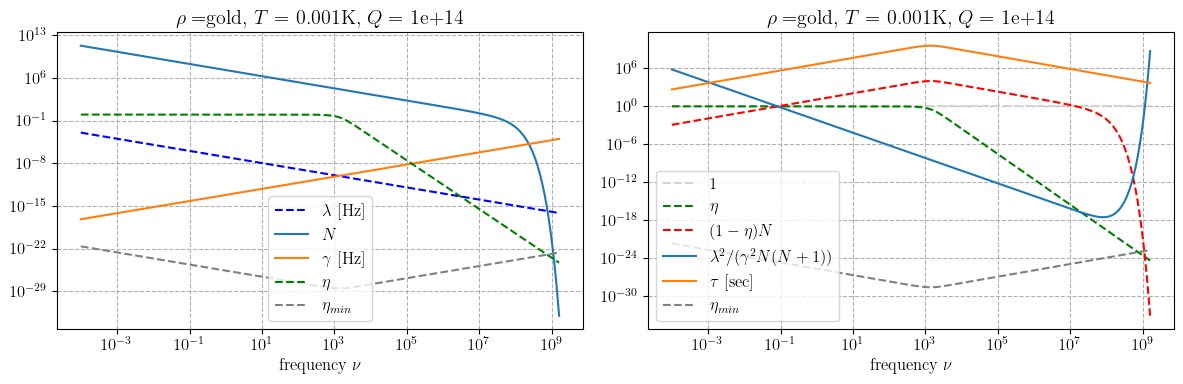

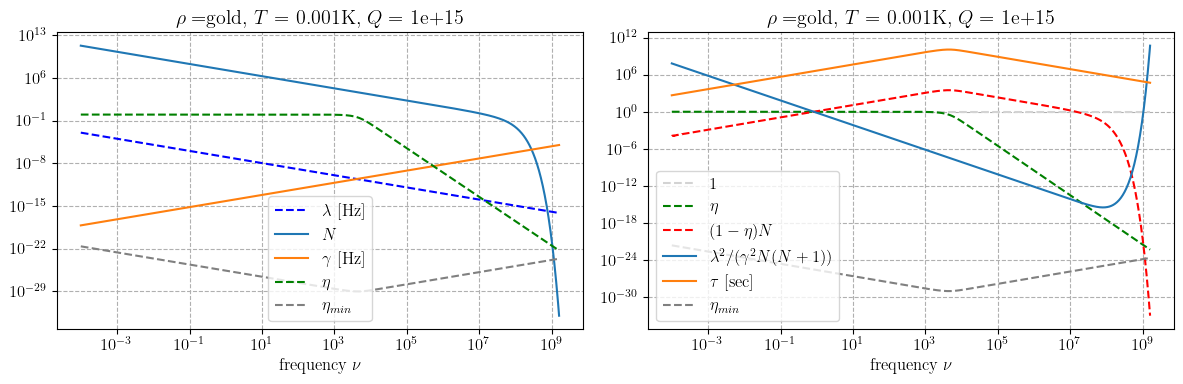

In [4]:
freqs = np.logspace(-4, 9.2, 1000)
omegas = 2 * np.pi * freqs

for quality_factor in (1E13, 1E14, 1E15):
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    ax1.loglog(freqs, lam(omegas), label="$\lambda$  [Hz]", color="blue", linestyle="dashed")
    ax1.loglog(freqs, n_bose(omegas), label="$N$")
    ax1.loglog(freqs, gamma(omegas, quality_factor), label="$\gamma$ [Hz]")
    ax1.loglog(freqs, eta(omegas, quality_factor), label="$\eta$", color="green", linestyle="dashed")
    ax1.loglog(freqs, eta_min(omegas, quality_factor,1), label="$\eta_{min}$", color="gray", linestyle="dashed")

    ax2.loglog(freqs, np.ones_like(omegas), label="1", linestyle="dashed", color="lightgray")
    ax2.loglog(freqs, eta(omegas, quality_factor), label="$\eta$", color="green", linestyle="dashed")
    ax2.loglog(freqs, (1- eta(omegas, quality_factor)) * n_bose(omegas), label="$(1 - \eta) N$",color="red", linestyle="dashed")
    ax2.loglog(freqs, non_classicality_condition(omegas, quality_factor), label="$\lambda^2/(\gamma^2 N (N+1))$")
    ax2.loglog(freqs, tau(omegas, quality_factor), label="$\\tau$ [sec]")
    ax2.loglog(freqs, eta_min(omegas, quality_factor,1), label="$\eta_{min}$", color="gray", linestyle="dashed")

    for ax in (ax1, ax2):
        # ax.set_ylim(0.001 * eta(omegas)[-1], 1E5)
        ax.grid(linestyle='--')
        ax.set_title(f"$\\rho=$gold, $T=${temp: n}K, $Q=${quality_factor: n}")
        ax.set_xlabel("frequency $\\nu$")
        ax.legend()
    plt.tight_layout()


/tmp/ipykernel_12660/1480401909.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)
/tmp/ipykernel_12660/1480401909.py:20: RuntimeWarning: divide by zero encountered in divide
  return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))


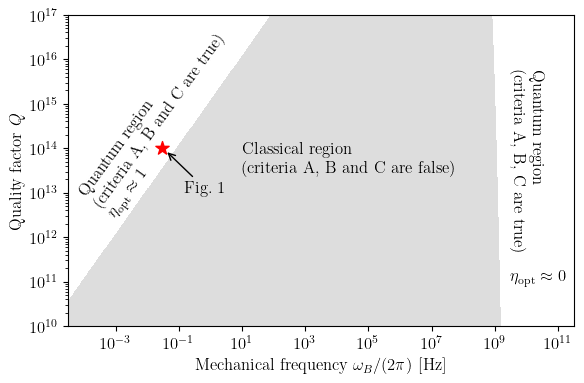

In [124]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs

quality_factors = np.logspace(10, 17, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)
z = np.sign(non_classicality_condition(xo, y) - 1.0)

fig, ax1 = plt.subplots(1, 1, figsize=(6, 4), rasterized=True)
c = ax1.pcolormesh(x, y, z, cmap="gray", vmin=-8, vmax=0.1)
ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$ [Hz]")
ax1.set_ylabel("Quality factor $Q$")
ax1.text(0.00006, 0.3*10**13, 'Quantum region \n (criteria A, B and C are true) \n $\eta_{\\rm opt} \\approx 1$', rotation=54)
ax1.text(0.01*10**3, 3*10**13, 'Classical region \n (criteria A, B and C are false)', rotation=0)
ax1.text(0.3*10**10, 5*10**11, 'Quantum region \n (criteria A, B, C are true)', rotation=-90)
ax1.text(0.3*10**10, 10**11, '$\eta_{\\rm opt} \\approx 0$', rotation=0)
ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)
ax1.annotate('Fig.~1', xy=(0.037, 0.9*10**14), xytext=(0.15, 10**13), arrowprops=dict(arrowstyle="->", color="black"))


plt.tight_layout()

fig.savefig(fname="quality_factor_frequency_space.pdf", dpi=300)

/tmp/ipykernel_12660/1480401909.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)
/tmp/ipykernel_12660/1480401909.py:20: RuntimeWarning: divide by zero encountered in divide
  return lam(omega)**2 / (gamma(omega, q)**2 * n_bose(omega) * (n_bose(omega) + 1.0))


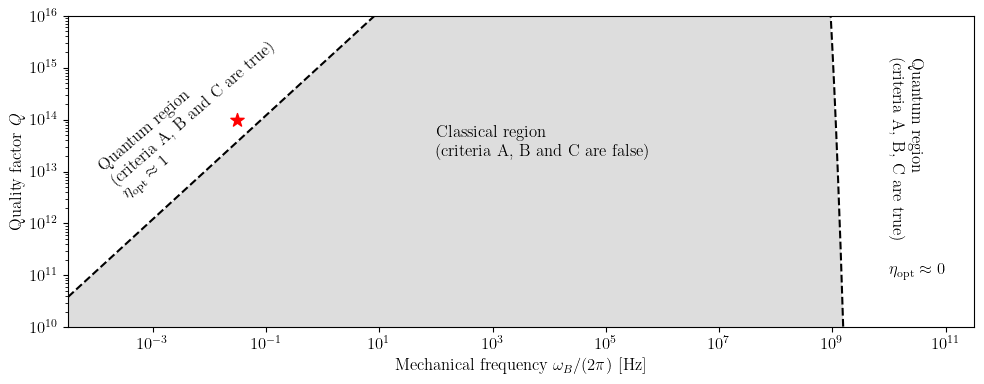

In [126]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs
quality_factors = np.logspace(10, 16, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)

z = np.sign(non_classicality_condition(xo, y) - 1.0)


fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), rasterized=True)
c = ax1.pcolormesh(x, y, z, cmap="gray", vmin=-8, vmax=0.1)

ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$ [Hz]")
ax1.set_ylabel("Quality factor $Q$")
ax1.text(0.0001, 0.3*10**13, 'Quantum region \n (criteria A, B and C are true) \n $\\eta_{\\rm opt} \\approx 1$', rotation=41)
ax1.text(10**2, 2*10**13, 'Classical region \n (criteria A, B and C are false)', rotation=0)
ax1.text(1*10**10, 5*10**11, 'Quantum region \n (criteria A, B, C are true)', rotation=-90)
ax1.text(1*10**10, 10**11, '$\\eta_{\\rm opt} \\approx 0$', rotation=0)

ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)
#ax1.annotate('Fig.~1', xy=(0.037, 0.9*10**14), xytext=(0.15, 10**13), arrowprops=dict(arrowstyle="->", color="black"))

Qs=classical_quantum_boundary_Q(omegas)
ax1.plot(freqs, Qs, color="black", linestyle="dashed")
ax1.set_xlim([freqs[0], freqs[-1]])
ax1.set_ylim([quality_factors[0], quality_factors[-1]])


plt.tight_layout()
plt.show()

fig.savefig(fname="quality_factor_frequency_space.pdf", dpi=300)

/tmp/ipykernel_12660/1480401909.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)


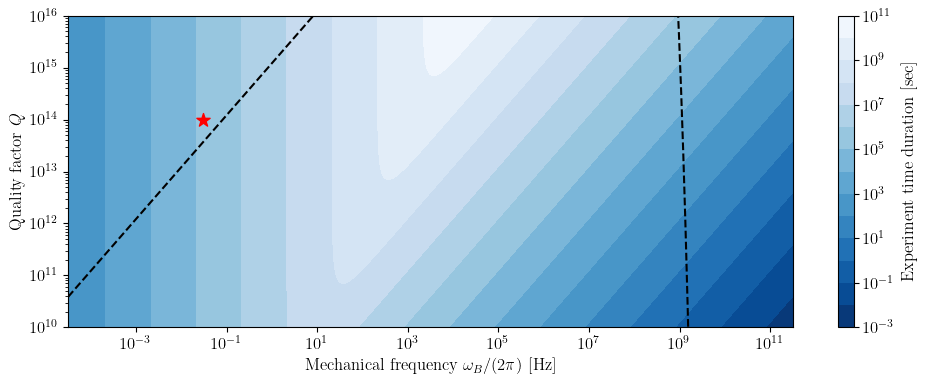

In [127]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs
quality_factors = np.logspace(10, 16, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)
z = tau(xo, y)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), rasterized=True)
c = ax1.contourf(x, y, z, levels=np.sort(10.0**np.linspace(-3, 11, 15)), cmap="Blues_r", norm=LogNorm())
ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$ [Hz]")
ax1.set_ylabel("Quality factor $Q$")
fig.colorbar(c, ax=ax1, label="Experiment time duration [sec]")

ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)

Qs=classical_quantum_boundary_Q(omegas)
ax1.plot(freqs, Qs, color="black", linestyle="dashed")
ax1.set_xlim([freqs[0], freqs[-1]])
ax1.set_ylim([quality_factors[0], quality_factors[-1]])

plt.tight_layout()
plt.show()

fig.savefig(fname="experiment_time_duration.pdf", dpi=300)

/tmp/ipykernel_12660/3382503060.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)


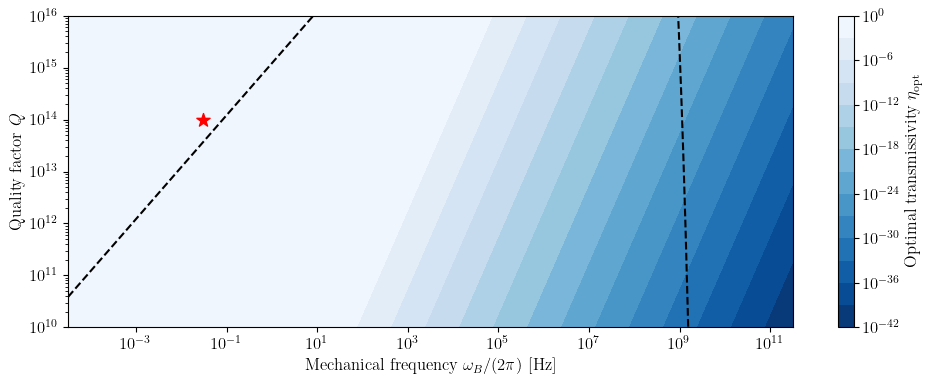

In [171]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs
quality_factors = np.logspace(10, 16, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)
z = eta(xo, y)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), rasterized=True)
c = ax1.contourf(x, y, z, levels=np.sort(10.0**np.linspace(0, -42, 15)), cmap="Blues_r", norm=LogNorm())
ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$  [Hz]")
ax1.set_ylabel("Quality factor $Q$")
fig.colorbar(c, ax=ax1, label="Optimal transmissivity $\eta_{\\rm opt}$")
ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)

Qs=classical_quantum_boundary_Q(omegas)
ax1.plot(freqs, Qs, color="black", linestyle="dashed")
ax1.set_xlim([freqs[0], freqs[-1]])
ax1.set_ylim([quality_factors[0], quality_factors[-1]])


plt.tight_layout()
plt.show()

fig.savefig(fname="eta.pdf", dpi=300)

/tmp/ipykernel_12660/3382503060.py:7: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp(omega / w_T) - 1.0)


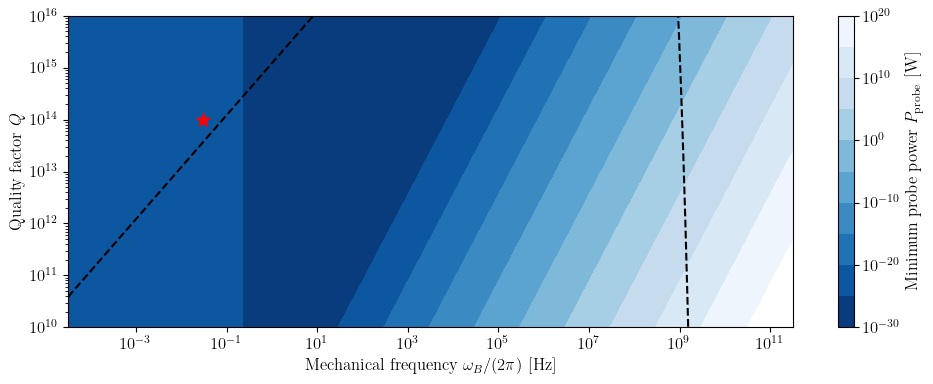

In [212]:
freqs = np.logspace(-4.5, 11.5, 1000)
omegas =2 * np.pi * freqs
quality_factors = np.logspace(10, 16, 1000)

x, y = np.meshgrid(freqs, quality_factors)
xo, y = np.meshgrid(omegas, quality_factors)
z = power_min(xo, y)

fig, ax1 = plt.subplots(1, 1, figsize=(10, 4), rasterized=True)
c = ax1.contourf(x, y, z, levels=np.sort(10.0**np.linspace(-30, 20, 11)), cmap="Blues_r", norm=LogNorm())
ax1.loglog()
ax1.set_xlabel("Mechanical frequency $\\omega_B/ (2\\pi)$  [Hz]")
ax1.set_ylabel("Quality factor $Q$")
fig.colorbar(c, ax=ax1, label="Minimum probe power $P_{\\rm probe}$ [W]")
ax1.scatter(0.03, 10**14, s=100, marker='*', color='red', zorder=1)

Qs=classical_quantum_boundary_Q(omegas)
ax1.plot(freqs, Qs, color="black", linestyle="dashed")
ax1.set_xlim([freqs[0], freqs[-1]])
ax1.set_ylim([quality_factors[0], quality_factors[-1]])


plt.tight_layout()
plt.show()

fig.savefig(fname="eta.pdf", dpi=300)